# Exploratory data analysis (EDA)
Exploratory Data Analysis or EDA is used to get insights from the data. <br>
Time series  models can be univariate or multivariate. We are going to conduct EDA on a multivariate time series model since the data has multiple dependent variables (the output depends on more than one series)

## Load Data

In [1]:
# importing libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import datetime, time
from scipy import stats
import itertools
import plotly.express as px
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")



### Importing scripts

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
for dirname, _, filenames in os.walk('../scripts/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../scripts/data_info.py
../scripts/data_Preprocess.py
../scripts/Reg_script.py
../scripts/VisualisationPlots.py
../scripts/__pycache__/data_info.cpython-310.pyc
../scripts/__pycache__/VisualisationPlots.cpython-310.pyc


### Custom library

In [4]:
from VisualisationPlots import VisualiseDf
from data_info import  DataInfo
#sns.set()

In [5]:
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/sample_submission.csv
../data/store.csv
../data/test.csv
../data/train.csv
../data/.git/config
../data/.git/description
../data/.git/HEAD
../data/.git/hooks/applypatch-msg.sample
../data/.git/hooks/commit-msg.sample
../data/.git/hooks/fsmonitor-watchman.sample
../data/.git/hooks/post-update.sample
../data/.git/hooks/pre-applypatch.sample
../data/.git/hooks/pre-commit.sample
../data/.git/hooks/pre-merge-commit.sample
../data/.git/hooks/pre-push.sample
../data/.git/hooks/pre-rebase.sample
../data/.git/hooks/pre-receive.sample
../data/.git/hooks/prepare-commit-msg.sample
../data/.git/hooks/push-to-checkout.sample
../data/.git/hooks/update.sample
../data/.git/info/exclude


In [6]:
# load all dataframes into notebook

sample_df = pd.read_csv("../data/sample_submission.csv")
store_df = pd.read_csv("../data/store.csv")
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")


In [7]:
sample_df.head(2)

,Id,Sales
0,1,0
1,2,0


In [8]:
sample_df.shape

(41088, 2)

In [10]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [11]:
store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [12]:
store_df.shape

(1115, 10)

In [13]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [20]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [14]:
test_df.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [15]:
test_df.shape

(41088, 8)

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [17]:
train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [18]:
train_df.shape

(1017209, 9)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


So far, here is what we can tell about the data:<br>
<Li>sample_submission.csv - this is a sample submission file in correct format
<li>train.csv - historical data including sales
<li>test.csv - historical data excluding 'Sales' and 'customers'
<li>store.csv - supplemental information about the stores

## 2. Data Visualisation

In [15]:
# plotting a line plot of the train data. takes over 20 mins to run. interrupted. 

# sns.set(rc={'figure.figsize':(24,8)})
# ax=sns.lineplot(data=train_df,x='Date',y='Sales',hue='Customers')
# ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

In [20]:
# plotting a line plot of the train data

# sns.set(rc={'figure.figsize':(24,8)})
# ax=sns.lineplot(data=test_df,x='Date',y='Sales',hue='Customers')
# ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

In [24]:
# plotting histograms on train data

# train_df.hist(column='DayOfWeek')
# train_df.hist(column='Date')
# train_df.hist(column='Sales')
# train_df.hist(column='Customers')
# train_df.hist(column='Open')
# train_df.hist(column='Promo')
# train_df.hist(column='StateHoliday')
# train_df.hist(column='SchoolHoliday')

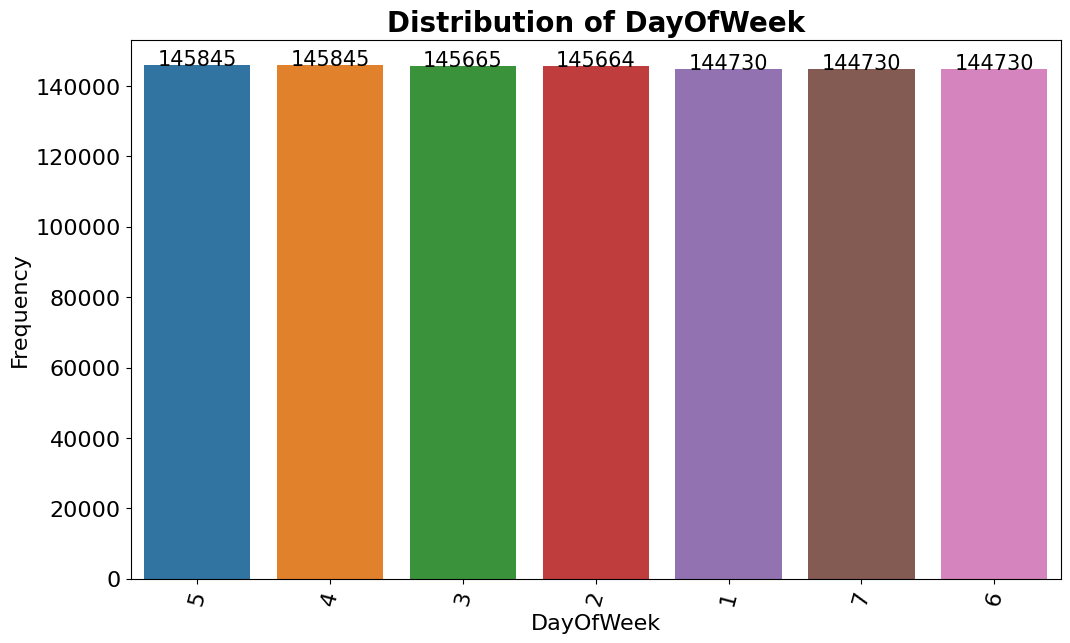

In [23]:
VisualiseDf.plot_count(train_df, 'DayOfWeek')


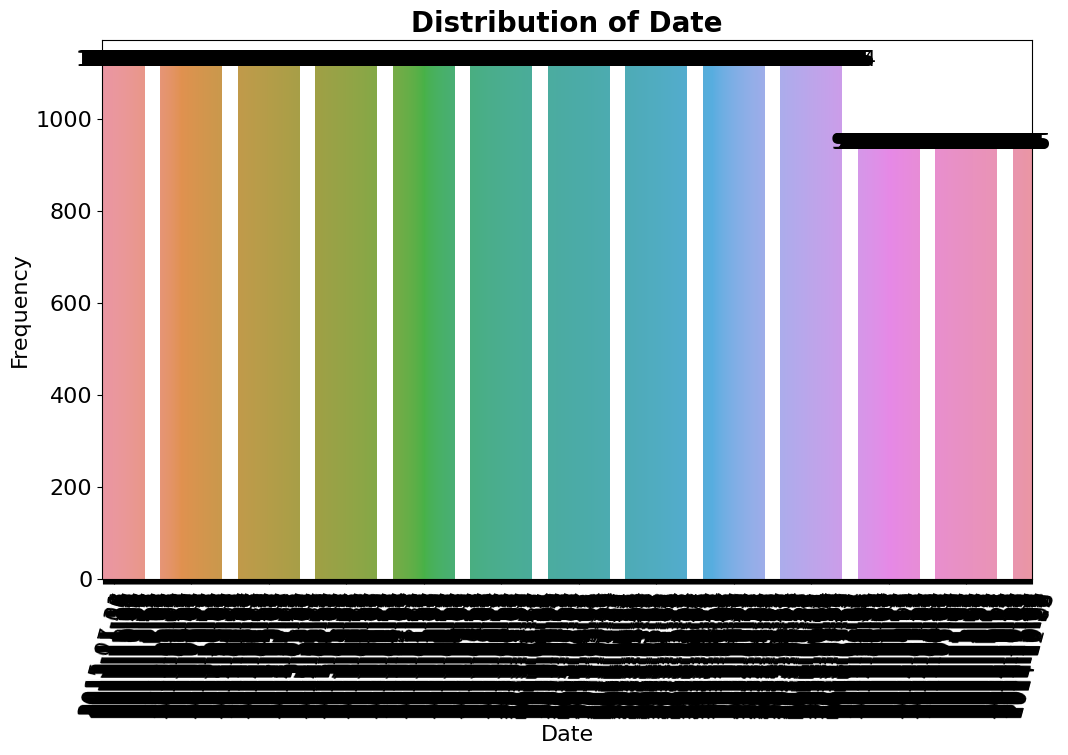

In [25]:
VisualiseDf.plot_count(train_df, 'Date')

In [ ]:
VisualiseDf.plot_count(train_df, 'Sales')

In [ ]:
VisualiseDf.plot_count(train_df, 'Customers')

In [ ]:
VisualiseDf.plot_count(train_df, 'Open')

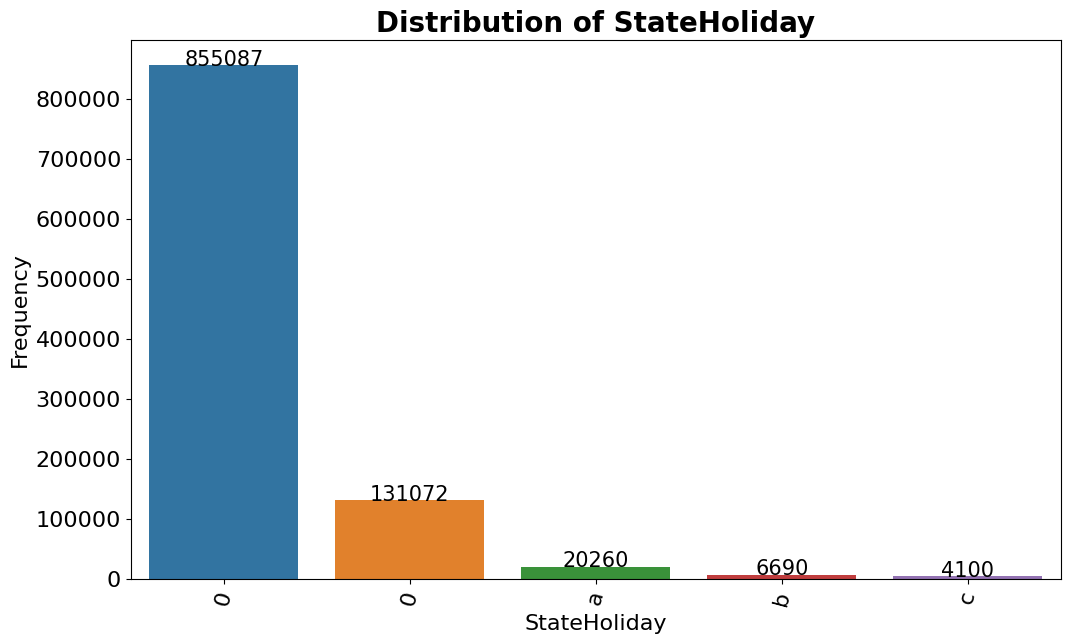

In [26]:
VisualiseDf.plot_count(train_df, 'StateHoliday')

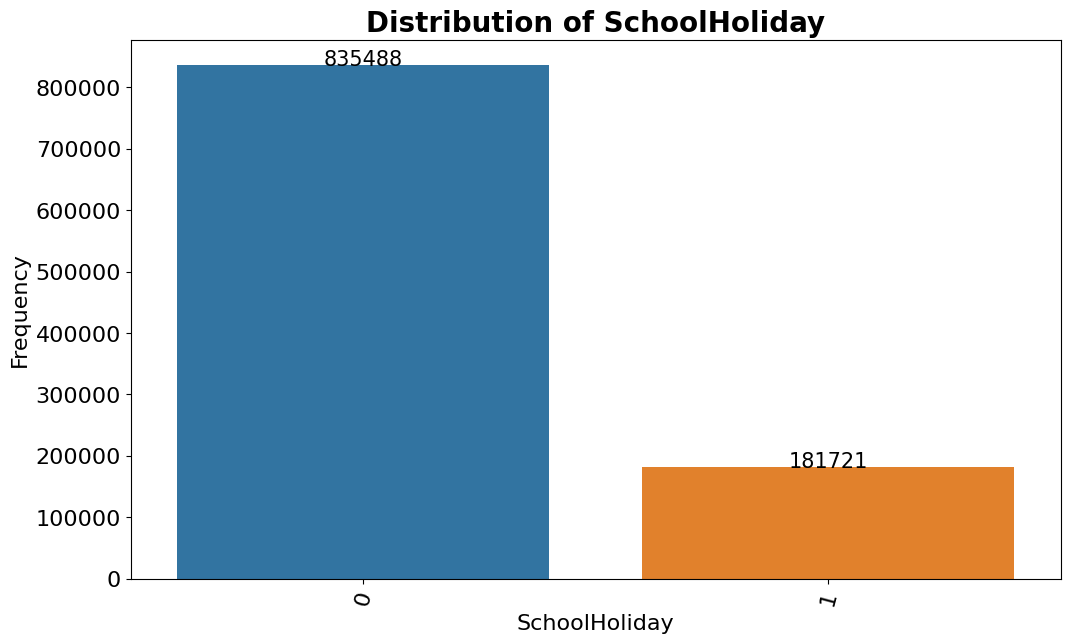

In [27]:
VisualiseDf.plot_count(train_df, 'SchoolHoliday')

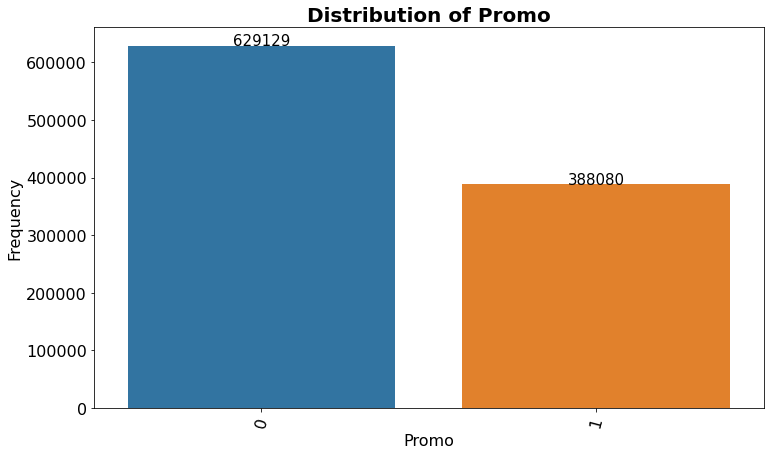

In [17]:
# checking distribution of 'Promo' (promotions) in the train_df

VisualiseDf.plot_count(train_df, 'Promo')

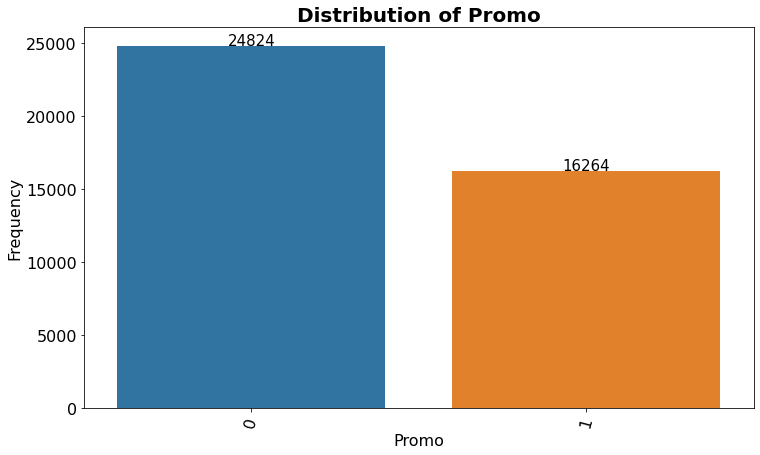

In [18]:
# checking distribution of 'Promo' (promotions) in the test_df

VisualiseDf.plot_count(test_df, 'Promo')

Promotions are distributed similarly in both the test data (left) and the train data (right) with the proportions of when they had promotions being 0.6168 for the train data and 0.6551 for the test data.

In [ ]:


# Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
# sns.lineplot(x="timepoint", y="signal",
#              hue="region", style="event",
#              data=train_df)

# ==============================================